<a href="https://colab.research.google.com/github/Sarthak2597/Credit-Card-Attrition-data/blob/main/Credit_Card_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.10


# Introduction

Credit card attrition is, in simple terms, a reduction in credit card users for a company. Credit card attrition is enhanced by several factors. Some involve market conditions (changes in the economy) and some involve particulars at a specific company. In any case, reducing attrition and winning back customers requires strong action plans that are marketed specifically toward former customers [1]. 

In this notebook, we try our hands with various Machine Learning techniques to classify the likelihood of a customer leaving the or staying with the credit card service. The dataset used here is acquired from here [2].

**Loading the data**

In this section, we will import all the relevant libraries along with our data.

In [ ]:
pip install scikit-learn==0.24.1

     |████████████████████████████████| 22.3MB 81.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
pip install pandas==1.1.5

In [ ]:
pip install ipython==7.16.1

In [ ]:
pip install scipy==1.5.4

In [ ]:
pip install traitlets==4.3.3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
print(sklearn. __version__)
from sklearn import svm
import seaborn as sns
import pickle
from sklearn import preprocessing
from IPython.display import clear_output
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
%matplotlib inline

0.24.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
df=df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)

In [ ]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


**Normalizing the numerical features**

SVM and KNN works best on a normalized data. The norm() function achieves this purpose as shown below. Note that we don't normalize the 'Avg_Utilization_Ratio' feature as it already falls in an acceptable range (0-1). 

In [ ]:
def norm(y):
  y1=[]
  y1 = y.split()
  for x in y1:
    df[x] = (df[x] - df[x].min())/(df[x].max()-df[x].min())
  return df

In [ ]:
norm("Credit_Limit Total_Revolving_Bal Avg_Open_To_Buy Total_Amt_Chng_Q4_Q1 Total_Trans_Amt Total_Trans_Ct Total_Ct_Chng_Q4_Q1")

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,0.077536,0.735399,0.062266,0.206947,0.832647,0.829457,0.230749,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,0.085819,0.868494,0.060499,0.236679,0.459219,0.457364,0.183899,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,0.120042,0.000000,0.156637,0.241095,0.544175,0.387597,0.220248,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,0.116172,0.000000,0.152928,0.157492,0.438689,0.403101,0.194400,0.000


# Converting Categorical Data into Numerical

Some of the importnat parameters like Card category, Education level, Attrition_Flag, etc are purely in categorical format. We must convert them into numerical values in order to perform machine learning on the data

In [ ]:
def mapp(x):
    lis=[]
    for i in range(len(x.unique())):
        lis.append(i)
    for j in range(len(lis)):
        print(x.unique()[j],":",lis[j])

In [ ]:
mapp(df['Attrition_Flag'])
num_val1, meta_data = pd.factorize(df['Attrition_Flag'])
print()
df['Attrition_Flag'] = num_val1

Existing Customer : 0
Attrited Customer : 1



In [ ]:
mapp(df['Card_Category'])
num_val2, meta_data = pd.factorize(df['Card_Category'])
df['Card_Category'] = num_val2

Blue : 0
Gold : 1
Silver : 2
Platinum : 3


In [ ]:
mapp(df['Education_Level'])
num_val3, meta_data = pd.factorize(df['Education_Level'])
df['Education_Level'] = num_val3

High School : 0
Graduate : 1
Uneducated : 2
Unknown : 3
College : 4
Post-Graduate : 5
Doctorate : 6


In [ ]:
mapp(df['Income_Category'])
num_val4, meta_data = pd.factorize(df['Income_Category'])
df['Income_Category'] = num_val4

$60K - $80K : 0
Less than $40K : 1
$80K - $120K : 2
$40K - $60K : 3
$120K + : 4
Unknown : 5


In [ ]:
mapp(df['Gender'])
num_val3, meta_data = pd.factorize(df['Gender'])
df['Gender'] = num_val3

M : 0
F : 1


In [ ]:
mapp(df['Marital_Status'])
num_val3, meta_data = pd.factorize(df['Marital_Status'])
df['Marital_Status'] = num_val3

Married : 0
Single : 1
Unknown : 2
Divorced : 3


We rename the feature 'Attrition_Flag' to 'Target' and place it in the end (because it looks better if the label is at the end of the table)

In [ ]:
df.insert(20, 'Target', df['Attrition_Flag'])
df=df.drop(['Attrition_Flag'], axis=1)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Target
0,57,1,2,6,0,1,0,36,1,3,3,0.005342,0.377433,0.019181,0.149249,0.094692,0.255814,0.104200,0.588,1
1,45,0,3,1,0,3,0,40,1,4,3,0.197737,0.000000,0.231101,0.136885,0.252921,0.410853,0.229672,0.000,1
2,46,0,4,1,1,0,0,38,3,3,2,0.087573,0.985300,0.053661,0.159847,0.048014,0.201550,0.301023,0.572,0
3,56,0,4,1,3,0,0,36,6,3,3,0.144681,0.000000,0.180251,0.270827,0.471181,0.449612,0.156435,0.000,1
4,53,0,1,1,2,0,2,44,5,2,1,0.753580,0.270163,0.744125,0.146600,0.161400,0.449612,0.212439,0.026,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,53,1,4,6,0,1,0,37,6,2,2,0.068950,1.000000,0.034741,0.196055,0.115556,0.255814,0.144319,0.677,1
10123,39,1,2,1,0,1,0,29,3,2,2,0.007216,0.000000,0.048503,0.255814,0.107210,0.240310,0.190630,0.000,1
10124,33,1,2,1,1,1,0,24,6,2,3,0.011116,0.000000,0.052241,0.289373,0.129242,0.255814,0.176090,0.000,1
10125,57,1,1,3,1,1,0,44,4,3,2,0.034032,0.499801,0.037754,0.340300,0.120340,0.255814,0.234249,0.491,0


# Focusing on relevant parameters
In this section, we will find the terms that contribute the most to our target data and get rid of other parameters that have no correlation with it.

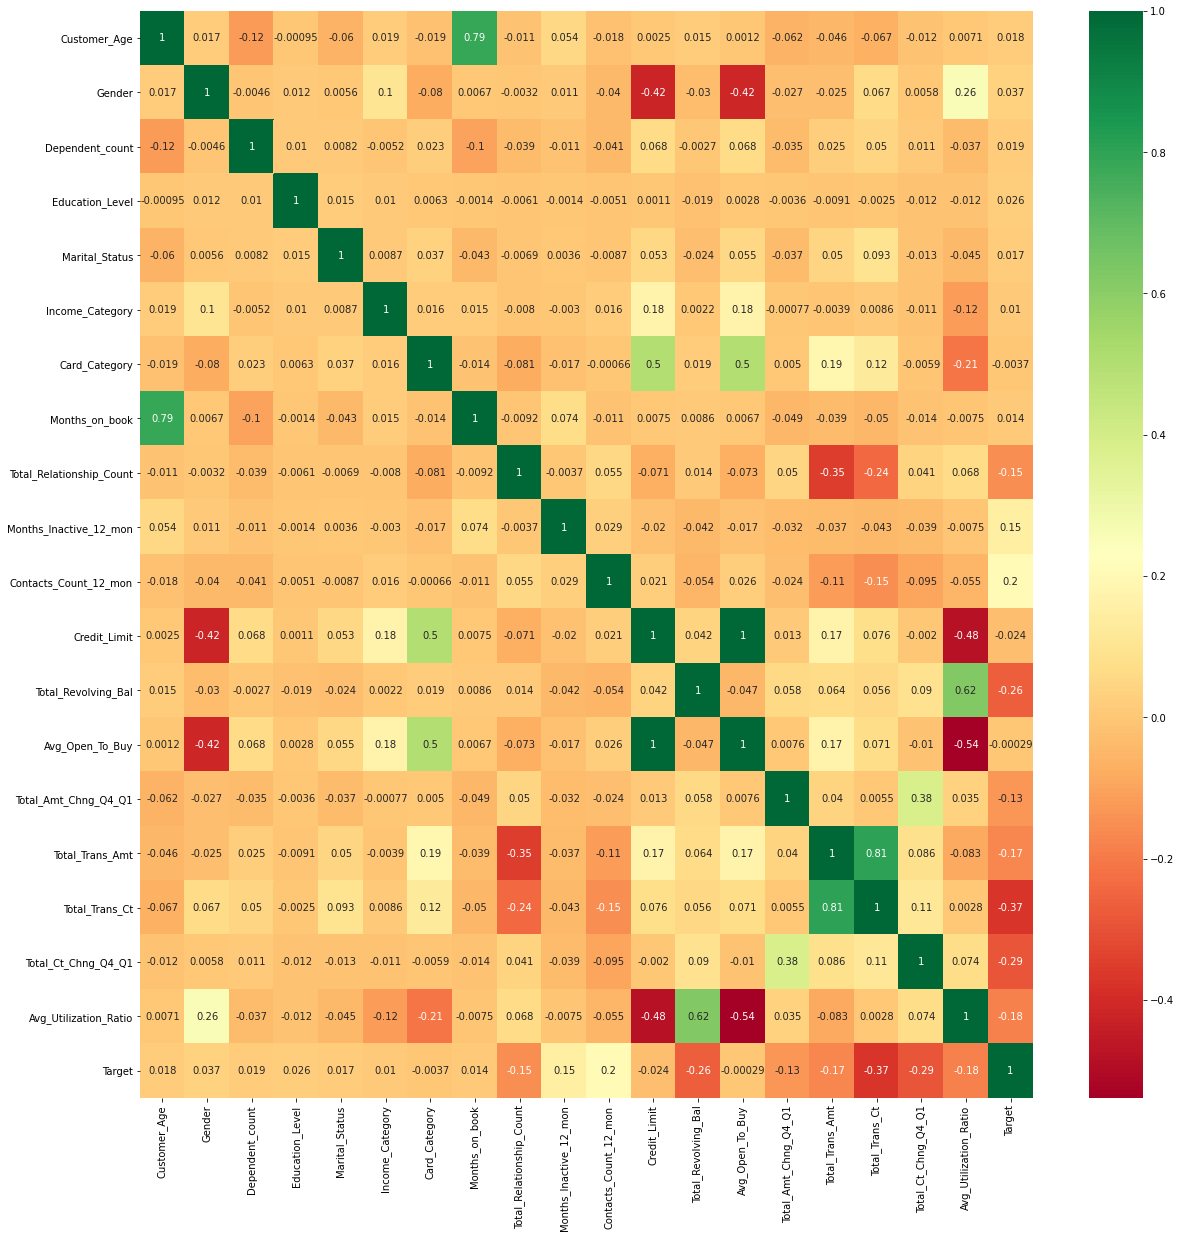

In [ ]:
corrmat=df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

*Avg_Open_To_Buy*: Average open to buy is the difference between the credit limit and available funds in the account. This is in strong correlation with Credit_Limit and hence can be dropped.

*Card_category*: Card type is another parameter that has almost no correlation with the Aim.

# Allowed Terms
The correlation heat map is based on Karl-Pearson coefficients. We can set a threshold value for allowable terms (here I have set it as |coefficient| = 0.1). All the other terms below this threshold do not contribute significantly and so can be ommitted. 

In [ ]:
df = df.drop(['Marital_Status','Gender','Income_Category','Education_Level','Card_Category','Avg_Open_To_Buy','Credit_Limit','Months_on_book','Dependent_count','Customer_Age'], axis=1)
df

,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Target
0,1,3,3,0.377433,0.149249,0.094692,0.255814,0.104200,0.588,1
1,1,4,3,0.000000,0.136885,0.252921,0.410853,0.229672,0.000,1
2,3,3,2,0.985300,0.159847,0.048014,0.201550,0.301023,0.572,0
3,6,3,3,0.000000,0.270827,0.471181,0.449612,0.156435,0.000,1
4,5,2,1,0.270163,0.146600,0.161400,0.449612,0.212439,0.026,0
...,...,...,...,...,...,...,...,...,...,...
10122,6,2,2,1.000000,0.196055,0.115556,0.255814,0.144319,0.677,1
10123,3,2,2,0.000000,0.255814,0.107210,0.240310,0.190630,0.000,1
10124,6,2,3,0.000000,0.289373,0.129242,0.255814,0.176090,0.000,1
10125,4,3,2,0.499801,0.340300,0.120340,0.255814,0.234249,0.491,0


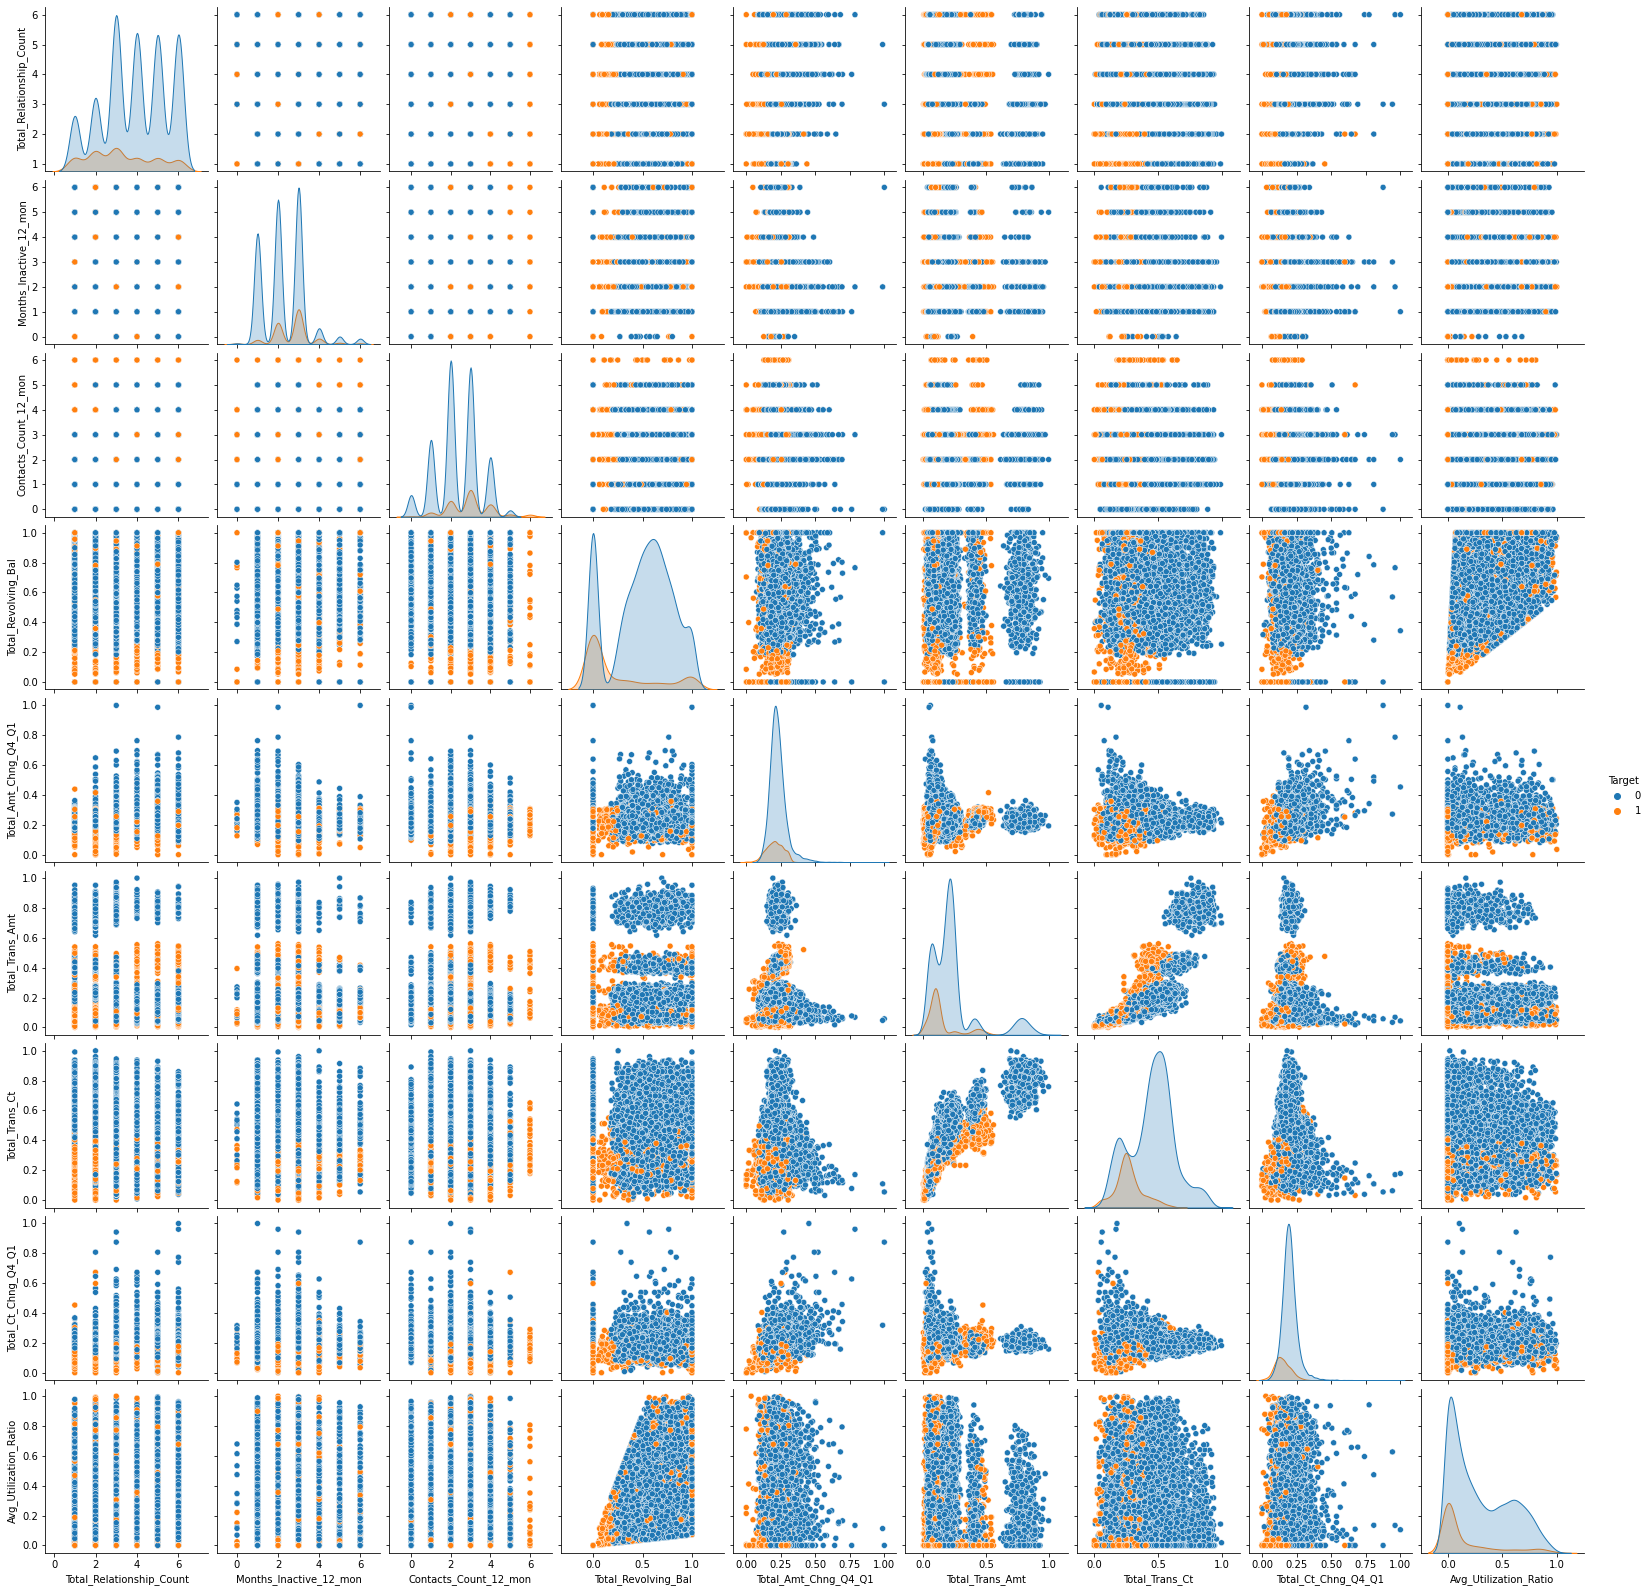

In [ ]:
sns.pairplot(df, hue='Target')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


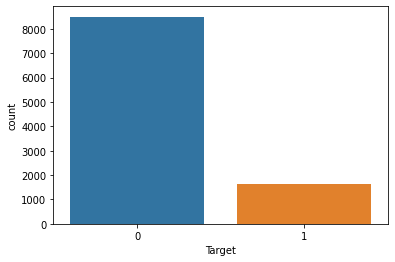

In [ ]:
sns.countplot(df['Target'], label = "Count")

# Machine Learning (SVM)
In this section we are going to further augment the dataset to cater to machine learning requirements. We are going to employ a SVM model to solve this problem.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
working_data = df.iloc[0:10000,:]
testing_data = df.iloc[10000:,:]

In [ ]:
xx=testing_data.iloc[:,:9]
yy=testing_data.iloc[:,9:]

In [ ]:
x = working_data.iloc[:,:9]
labels = working_data.iloc[:,9:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.svm import SVC

**Finding the best parameters**

The parameters for our model to be trained are needed to be carefully tuned to get the best results. Here we use GridSearchCV to optimize the SVM parameters.

In [ ]:
C_range=[]
gamma_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for i in range (1,21):
  C_range.append(i)




print(C_range)
print(gamma_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:
param_grid=dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

from IPython.display import clear_output
clear_output()

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 20, 'gamma': 0.3} with a score of 0.93


**Training the model**

In [ ]:
model = SVC(C=20, kernel ='rbf', gamma=0.3)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=20, gamma=0.3)

In [ ]:
preds = model.predict(X_test)

Analyzing the results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

In [ ]:
cm = np.array(confusion_matrix(y_test, preds, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual_Not_Targeted', 'Actual_Targeted'],
                         columns=['predicted_Not_Targeted','predicted_Targeted'])
confusion

,predicted_Not_Targeted,predicted_Targeted
Actual_Not_Targeted,1630,46
Actual_Targeted,105,219


In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1676
           1       0.83      0.68      0.74       324

    accuracy                           0.92      2000
   macro avg       0.88      0.82      0.85      2000
weighted avg       0.92      0.92      0.92      2000



In [ ]:
matthews_corrcoef(y_test,preds)

0.7047468949964425

In [ ]:
def strength(conf):
  if conf[1][0]>conf[1][1]:
    print("Fewer Correct predictions than wrong predictions")
  else:
    det = np.linalg.det(conf)
    print("Strength of the matrix : ",det)

In [ ]:
strength(cm)

Strength of the matrix :  352139.99999999994


**Predicting on unseen data**

In [ ]:
new_output = model.predict(xx)

In [ ]:
lis=[]
for i in yy['Target']:
  lis.append(i)

In [ ]:
c=0
for j in range(len(new_output)):
  if lis[j]==new_output[j]:
    c=c+1
print("The number of occasions on which our model showed correct classification:",c,"out-off",j+1,"cases")

The number of occasions on which our model showed correct classification: 120 out-off 127 cases


In [ ]:
cm = np.array(confusion_matrix(lis, new_output, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual_Not_Targeted', 'Actual_Targeted'],
                         columns=['predicted_Not_Targeted','predicted_Targeted'])
confusion

,predicted_Not_Targeted,predicted_Targeted
Actual_Not_Targeted,109,0
Actual_Targeted,7,11


In [ ]:
strength(cm)

Strength of the matrix :  1198.9999999999998


**Saving the model to a pickle file**

In [ ]:
Pkl_Filename = "SVM_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

This cell is exclusively for users working in Colab. 

(Collected directly from [3])

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id':'1YF6POMEqd-_tHBoSh58ovBxLeN8RtvH1'}]})
file.SetContentFile("SVM_Model.pkl")
file.Upload() 

# Machine Learning (KNN)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy  = []  
test_accuracy = []
x_axis=[]
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    x_axis.append(i)
    
from IPython.display import clear_output
clear_output()

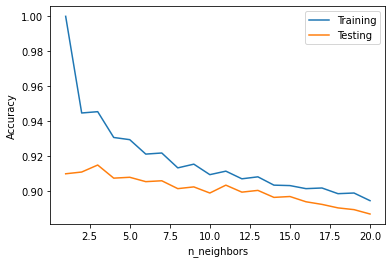

In [ ]:
plt.plot(x_axis, training_accuracy, label="Training")
plt.plot(x_axis, test_accuracy, label="Testing")
plt.legend(["Training", "Testing"], loc ="upper right")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
cm = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual_Not_Targeted', 'Actual_Targeted'],
                         columns=['predicted_Not_Targeted','predicted_Targeted'])
confusion

,predicted_Not_Targeted,predicted_Targeted
Actual_Not_Targeted,1627,49
Actual_Targeted,121,203


Trying our model on unseen data

In [ ]:
new_output = knn.predict(xx)

In [ ]:
lis=[]
for i in yy['Target']:
  lis.append(i)

In [ ]:
c=0
for j in range(len(new_output)):
  if lis[j]==new_output[j]:
    c=c+1
print("The number of occasions on which our model showed correct classification:",c,"out-off",j+1,"cases")

The number of occasions on which our model showed correct classification: 119 out-off 127 cases


In [ ]:
cm = np.array(confusion_matrix(lis, new_output, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual_Not_Targeted', 'Actual_Targeted'],
                         columns=['predicted_Not_Targeted','predicted_Targeted'])
confusion

,predicted_Not_Targeted,predicted_Targeted
Actual_Not_Targeted,109,0
Actual_Targeted,8,10


In [ ]:
Pkl_Filename = "KNN_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id':'your folder id'}]})
file.SetContentFile("KNN_Model.pkl")
file.Upload() 

# Machine Learning (Logistic Regression)


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
c_values=[]
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
for i in range(0,50):
  c_values.append(i*0.1)
print(c_values)

In [ ]:
logistic=LogisticRegression()

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logistic, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
classifier = LogisticRegression(C=1.4, penalty='l2', solver='newton-cg')

In [ ]:
classifier.fit(X_train, y_train)

In [ ]:
predictions = classifier.predict(X_test)#make probability predictions with the model

In [ ]:
lis=[]
for i in y_test['Target']:
  lis.append(i)
print(lis)

iter=0 #initialising the variable 'iter' as 0
for i in range(len(lis)):
  if (lis[i]==predictions[i]):
    iter=iter+1
#print(iter) #printing the number of times our prediction turned out to be true

In [ ]:
print("no. of instances for which the model predicted correctly:",iter," out of", len(lis),"instances")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef
cm = np.array(confusion_matrix(y_test, predictions, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual_Not_Targeted', 'Actual_Targeted'],
                         columns=['predicted_Not_Targeted','predicted_Targeted'])
confusion

In [ ]:
print(classification_report(y_test,predictions))

Predicting on unseen data

In [ ]:
new_output = classifier.predict(xx)

In [ ]:
lis=[]
for i in yy['Target']:
  lis.append(i)

c=0
for i in range(len(yy['Target'])):
  if lis[i] == new_output[i]:
    c=c+1

In [ ]:
print("no. of instances for which the model predicted correctly:",c," out of", len(lis),"instances")

no. of instances for which the model predicted correctly: 121  out of 127 instances on the unseen dataset


In [ ]:
Pkl_Filename = "LR_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(classifier, file)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id':'1YF6POMEqd-_tHBoSh58ovBxLeN8RtvH1'}]})
file.SetContentFile("LR_Model.pkl")
file.Upload() 

# References

[1] https://pocketsense.com/reduce-credit-card-attrition-5852419.html

[2] https://www.kaggle.com/sakshigoyal7/credit-card-customers

[3] https://stackoverflow.com/questions/48558007/where-is-dumped-file-in-google-colab